In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
project_root = Path.cwd().parent.parent  # Assuming notebook is in experiments/notebooks/
sys.path.insert(0, str(project_root))
print(sys.path)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from experiments.analysis_utils.data_processing import read_directory
from experiments.analysis_utils.visualization import plot_reaction_speed_distribution, plot_token_distribution

['/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/miniconda3/envs/radCAD/lib/python312.zip', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12/lib-dynload', '', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12/site-packages']


In [2]:
from enum import Enum
class State(Enum):
    Normal = 1
    VetoSignalling = 2
    VetoSignallingDeactivation = 3
    VetoCooldown = 4

In [28]:
proposal_df_full, start_data_df_full, timestep_data_df_full = read_directory(Path('../../results/simulations/constant_veto_signalling_loop/'))

In [29]:
total_balance = timestep_data_df_full.groupby('run_id').actors_total_balance.first()
timestep_data_df_full.actors_total_locked_relative = timestep_data_df_full.actors_total_locked / timestep_data_df_full.run_id.map(total_balance)

In [30]:
start_data_df_full

,seed,first_seal_rage_quit_support,second_seal_rage_quit_support,attacker_funds,simulation_hash,determining_factor,lido_exit_share,churn_rate,timedelta_tick,n_actors,...,BaseActor,HonestActor,SingleAttacker,CoordinatedAttacker,Hacker,SingleDefender,CoordinatedDefender,run_id,initial_total_balance,attacker_share
0,1888,0.01,0.1,183599.480969,2951757731c75500a10d630a7e1dabe521995d8b62c49e...,0,0.3,14,0 days 03:00:00,1986,...,0,1985,0,1,0,0,0,0,9.179974e+06,0.02
1,1888,0.01,0.1,278238.388686,00f70930ecd48404a22424b82e2096475b44de31a76ff0...,0,0.3,14,0 days 03:00:00,1986,...,0,1985,0,1,0,0,0,1,9.274613e+06,0.03
2,1888,0.01,0.1,90872.470379,b6dc8c1250abb1a4827dcf8c573096e0f4c9e6c6a0740c...,0,0.3,14,0 days 03:00:00,1986,...,0,1985,0,1,0,0,0,2,9.087247e+06,0.01
3,1888,0.01,0.1,574236.674522,0f1f4ac0ac4b40298e7b3d91569283ddb3fff31a5f3ae3...,0,0.3,14,0 days 03:00:00,1986,...,0,1985,0,1,0,0,0,3,9.570611e+06,0.06
4,1888,0.01,0.1,473493.398290,0f60b90e8ee1f59f098229a480cab32a4c15642519b04c...,0,0.3,14,0 days 03:00:00,1986,...,0,1985,0,1,0,0,0,4,9.469868e+06,0.05
5,1888,0.01,0.1,677146.472823,e46a4831706cad0e72e0f762e41db10c5cad09dac29a35...,0,0.3,14,0 days 03:00:00,1986,...,0,1985,0,1,0,0,0,5,9.673521e+06,0.07
6,1888,0.01,0.1,374848.940313,764ab4f33d8f7e3fce4cbfe63507a2c25c2c90d4d4b685...,0,0.3,14,0 days 03:00:00,1986,...,0,1985,0,1,0,0,0,6,9.371224e+06,0.04
7,1888,0.01,0.1,889751.330852,a264961f0e2ce5cce486d581842328556b63ae0fb57949...,0,0.3,14,0 days 03:00:00,1986,...,0,1985,0,1,0,0,0,7,9.886126e+06,0.09
8,1888,0.01,0.1,782293.440653,0790860daad7091642fe75f2fbb8b035b112ad5177a1fd...,0,0.3,14,0 days 03:00:00,1986,...,0,1985,0,1,0,0,0,8,9.778668e+06,0.08


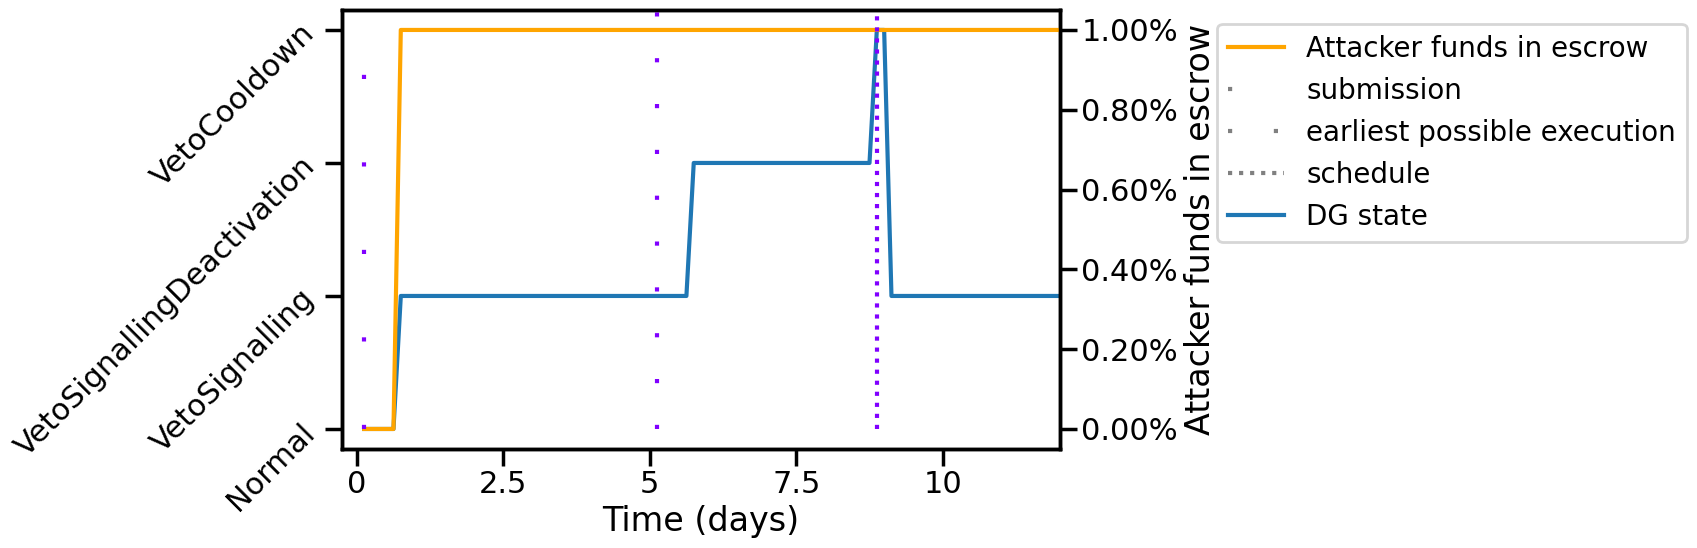

In [31]:
from matplotlib.ticker import PercentFormatter, FuncFormatter
from experiments.analysis_utils.visualization import add_proposal_data_to_timeplot

run_id = 2
timestep_data_df = timestep_data_df_full[timestep_data_df_full.run_id == run_id]
proposal_df = proposal_df_full[proposal_df_full.run_id == run_id]

sns.set_context("poster")
plt.figure(figsize=(19, 6))
line = plt.plot(timestep_data_df.timestep, timestep_data_df.dg_state_value, label='DG state')
plt.gca().set_yticks([state.value for state in State])
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: State(int(x)).name))
plt.gca().tick_params(axis='y', labelrotation=45)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{(x * 3 / 24):n}'))
plt.xlabel('Time (days)')

ax1 = plt.gca().twinx()
ax1.plot(timestep_data_df.timestep, timestep_data_df.actors_total_locked_relative, color='orange', label='Attacker funds in escrow')
ax1.set_ylabel('Attacker funds in escrow')
ax1.yaxis.set_major_formatter(PercentFormatter(1))

plt.xlim(-2, 12/3*24)

add_proposal_data_to_timeplot(ax1, proposal_df[proposal_df.proposal_id == 1], proposal_legend=False, lines=(1,1,1,0,1))

# Adjust the legend to be outside the plot
handles, labels = ax1.get_legend_handles_labels()
handles += [line[0]]
labels += [line[0].get_label()]
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.2, 1), fontsize='small', frameon=True)

# Use a tight layout
plt.tight_layout()
plt.savefig('../../images/veto_loop_timeplot.svg', transparent=True)

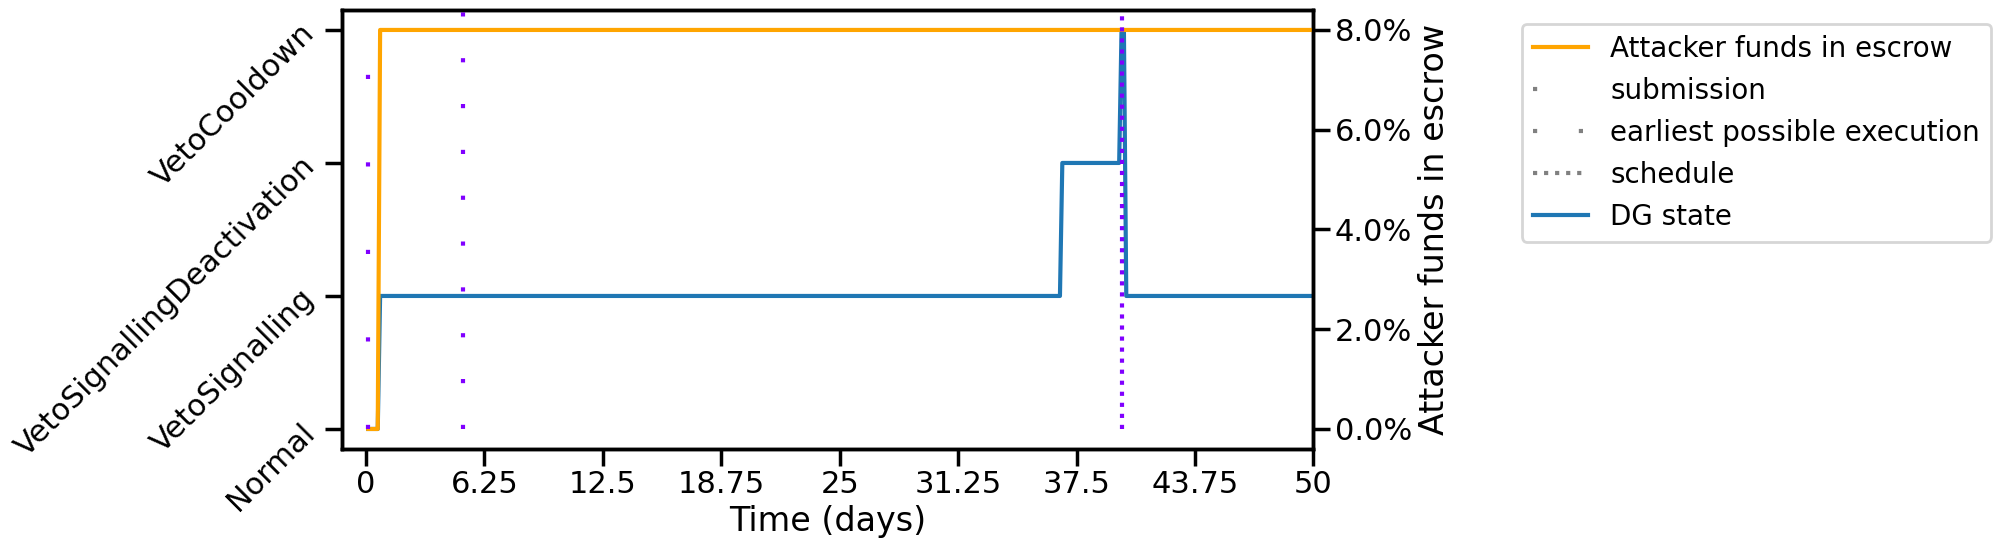

In [32]:
from matplotlib.ticker import PercentFormatter, FuncFormatter
from experiments.analysis_utils.visualization import add_proposal_data_to_timeplot

run_id = 8
timestep_data_df = timestep_data_df_full[timestep_data_df_full.run_id == run_id]
proposal_df = proposal_df_full[proposal_df_full.run_id == run_id]

sns.set_context("poster")
plt.figure(figsize=(22, 6))
line = plt.plot(timestep_data_df.timestep, timestep_data_df.dg_state_value, label='DG state')
plt.gca().set_yticks([state.value for state in State])
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: State(int(x)).name))
plt.gca().tick_params(axis='y', labelrotation=45)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{(x * 3 / 24):n}'))
plt.xlabel('Time (days)')

ax1 = plt.gca().twinx()
ax1.plot(timestep_data_df.timestep, timestep_data_df.actors_total_locked_relative, color='orange', label='Attacker funds in escrow')
ax1.set_ylabel('Attacker funds in escrow')
ax1.yaxis.set_major_formatter(PercentFormatter(1))

plt.xlim(-10, 50 / 3 * 24)

add_proposal_data_to_timeplot(ax1, proposal_df[proposal_df.proposal_id == 1], proposal_legend=False, lines=(1,1,1,0,1))

# Adjust the legend to be outside the plot
handles, labels = ax1.get_legend_handles_labels()
handles += [line[0]]
labels += [line[0].get_label()]
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.2, 1), fontsize='small', frameon=True)

# Use a tight layout
plt.tight_layout()

,execution_delay,execution_delay_days
attacker_share,,
0.01,-1,-0.125
0.02,-1,-0.125
0.03,-1,-0.125
0.04,-1,-0.125
0.05,-1,-0.125
0.06,-1,-0.125
0.07,-1,-0.125
0.08,-1,-0.125
0.09,-1,-0.125


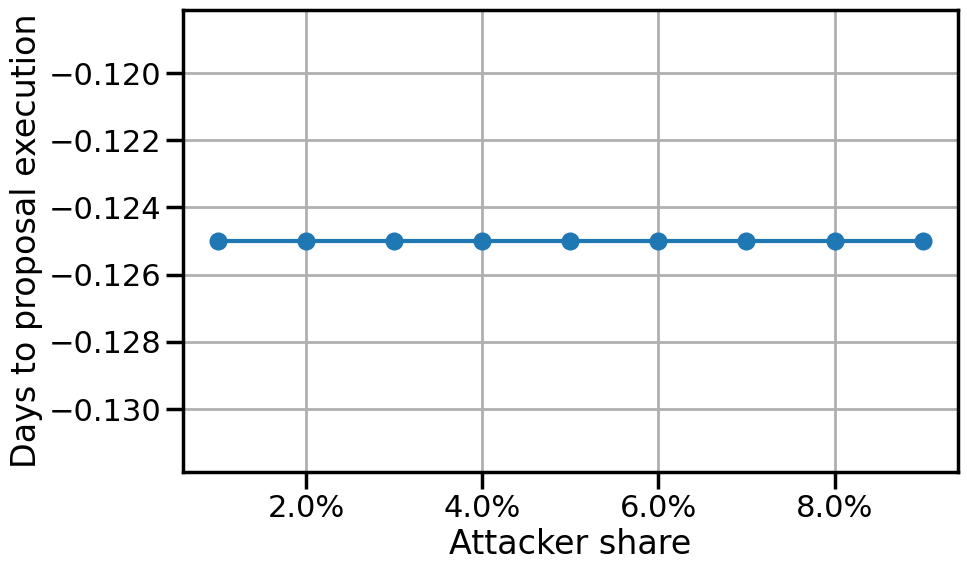

In [33]:
proposal_df_full['execution_delay'] = proposal_df_full.executedAt - proposal_df_full.submittedAt
proposal_df_full['schedule_delay'] = proposal_df_full.scheduledAt - proposal_df_full.submittedAt
proposal_df_full['execution_delay_hours'] = proposal_df_full.execution_delay * 3
proposal_df_full['schedule_delay_hours'] = proposal_df_full.schedule_delay * 3
proposal_df_full['execution_delay_days'] = proposal_df_full.execution_delay_hours / 24
proposal_df_full['schedule_delay_days'] = proposal_df_full.schedule_delay_hours / 24

first_proposal_df_full_with_params = proposal_df_full.groupby('run_id').first().merge(start_data_df_full, on='run_id')
first_proposal_df_full_with_params.sort_values('attacker_share', inplace=True)
display(first_proposal_df_full_with_params[['execution_delay', 'execution_delay_days', 'attacker_share']].set_index('attacker_share').sort_index())

plt.figure(figsize=(10, 6))
plt.plot(first_proposal_df_full_with_params.attacker_share, first_proposal_df_full_with_params.execution_delay_days, marker='o')
plt.ylabel('Days to proposal execution')
plt.xlabel('Attacker share')
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.grid(True);

In [34]:
def remove_leading_normal_states(group):
    # Find the first index where dg_state_name is not 'Normal'
    first_non_normal_index = group[group.dg_state_name != 'Normal'].index.min()
    # Return the group starting from this index
    return group.loc[first_non_normal_index:]




timestep_data_df_full_with_params = timestep_data_df_full.merge(start_data_df_full, on='run_id')
# Filter out normal timesteps
# filtered_df = timestep_data_df_full_with_params[timestep_data_df_full_with_params.dg_state_name != 'Normal']
filtered_df = timestep_data_df_full_with_params.groupby('run_id', group_keys=False).apply(remove_leading_normal_states)

# Calculate the veto loop duration for each attacker_share
veto_loop_duration = filtered_df.groupby('attacker_share').size()

# Count occurrences of each unique dg_state_name for each run_id
state_counts = filtered_df.groupby(['attacker_share', 'dg_state_name']).size().unstack(fill_value=0)

# Calculate ratios of each unique dg_state_name
state_ratios = state_counts.div(state_counts.sum(axis=1), axis=0)

# Display the results
print("\nVeto loop duration for each attacker_share (days):")
print(veto_loop_duration * 3 / 24)


Veto loop duration for each attacker_share (days):
attacker_share
0.01    179.375
0.02    179.375
0.03    179.375
0.04    179.375
0.05    179.375
0.06    179.375
0.07    179.375
0.08    179.375
0.09    179.375
dtype: float64


/tmp/ipykernel_213880/3132768923.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = timestep_data_df_full_with_params.groupby('run_id', group_keys=False).apply(remove_leading_normal_states)


In [37]:
print("\nDuration of each Dual Governance State for each attacker_share (days):")
display(state_counts * 3 / 24)


Duration of each Dual Governance State for each attacker_share (days):


dg_state_name,VetoCooldown,VetoSignalling,VetoSignallingDeactivation
attacker_share,,,
0.01,5.25,108.500,65.625
0.02,3.25,132.875,43.250
0.03,2.50,145.625,31.250
0.04,2.00,152.375,25.000
0.05,1.50,159.125,18.750
0.06,1.25,162.500,15.625
0.07,1.25,162.500,15.625
0.08,1.00,165.875,12.500
0.09,1.00,165.875,12.500


In [41]:
print("\nRatios of each Dual Governance State for each attacker_share:")
state_ratios = state_counts.div(state_counts.sum(axis=1), axis=0)
state_ratios = state_ratios.map(lambda x: round(x * 100, 0))
display(state_ratios)


Ratios of each Dual Governance State for each attacker_share:


dg_state_name,VetoCooldown,VetoSignalling,VetoSignallingDeactivation
attacker_share,,,
0.01,3.0,60.0,37.0
0.02,2.0,74.0,24.0
0.03,1.0,81.0,17.0
0.04,1.0,85.0,14.0
0.05,1.0,89.0,10.0
0.06,1.0,91.0,9.0
0.07,1.0,91.0,9.0
0.08,1.0,92.0,7.0
0.09,1.0,92.0,7.0


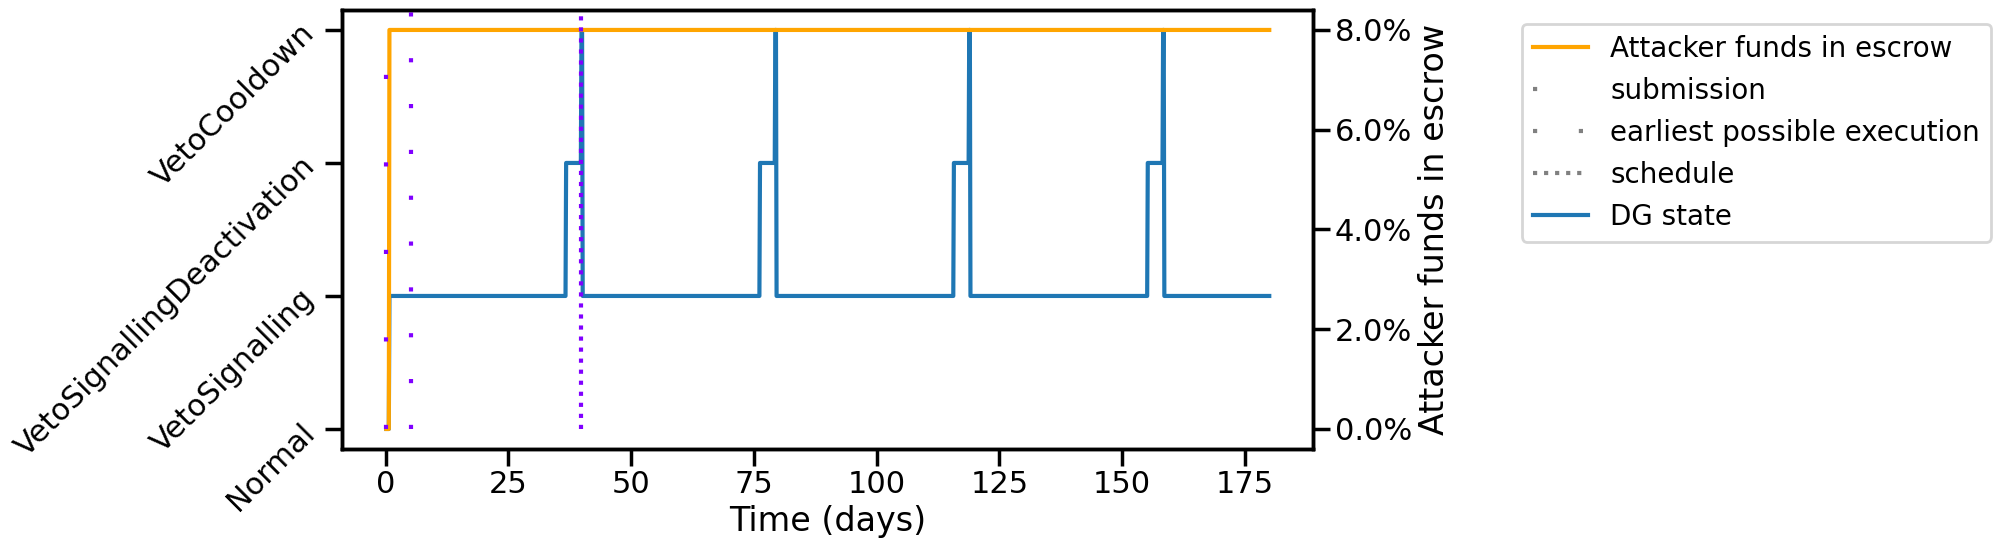

In [38]:
from matplotlib.ticker import PercentFormatter, FuncFormatter
from experiments.analysis_utils.visualization import add_proposal_data_to_timeplot

run_id = 8
timestep_data_df = timestep_data_df_full[timestep_data_df_full.run_id == run_id]
proposal_df = proposal_df_full[proposal_df_full.run_id == run_id]

sns.set_context("poster")
plt.figure(figsize=(22, 6))
line = plt.plot(timestep_data_df.timestep, timestep_data_df.dg_state_value, label='DG state')
plt.gca().set_yticks([state.value for state in State])
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: State(int(x)).name))
plt.gca().tick_params(axis='y', labelrotation=45)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{(x * 3 / 24):n}'))
plt.xlabel('Time (days)')

ax1 = plt.gca().twinx()
ax1.plot(timestep_data_df.timestep, timestep_data_df.actors_total_locked_relative, color='orange', label='Attacker funds in escrow')
ax1.set_ylabel('Attacker funds in escrow')
ax1.yaxis.set_major_formatter(PercentFormatter(1))

# plt.xlim(-10, 50 / 3 * 24)

add_proposal_data_to_timeplot(ax1, proposal_df[proposal_df.proposal_id == 1], proposal_legend=False, lines=(1,1,1,0,1))

# Adjust the legend to be outside the plot
handles, labels = ax1.get_legend_handles_labels()
handles += [line[0]]
labels += [line[0].get_label()]
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.2, 1), fontsize='small', frameon=True)

# Use a tight layout
plt.tight_layout()